# House Price Prediction using Feature Selection
 #### Author: Halit Vural

This work was inspired by the Author of

https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda

and completed with the support from Clarusway

http://www.clarusway.com 



<a id='toc'></a>
## Table of Contents

* [Introduction](#intro)
* [Import libraries](#import)
* [Load Data](#load)
* [Explore the most important variables](#explore)



<a id="intro"></a>
# Introduction 
| [toc](#toc)<br>
The work shown here is inspired by Clarusway educators and students. I used the flow of the notebook by Erik Bruin explaining EDA for House Price prediction. This work is to present Clarusway students for a recap of given Machine Learning course. All the code is taken from Clarusway teaching staff and the Internet search. The code without a reference gives a credit to Clarusway tutors. I tried to include the references from Internet searches.


<a id='import'></a>
### Import required libraries
| [toc](#toc)<br>
We will import the libraries needed for our method calls.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

local_mode = False
kaggle_mode = !local_mode

colab_mode = False

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [138]:
# !pip install matplotlib

In [139]:
# !pip install seaborn

<a id='load'></a>
# Load Data
| [toc](#toc)<br>

In [2]:
if local_mode:
    #ingest from local
    path = 'train.csv'
    
if kaggle_mode:
    path = '../input/house-prices-advanced-regression-techniques/train.csv'
    
# if colab_mode:
#     from google.colab import drive
#     drive.mount('/content/gdrive/')
#     path = '/content/gdrive/MyDrive/ML-DS/Git-Repo/ML-devcode/Kaggle/Competitions/House Price Prediction/train.csv'


#ingest data
df = pd.read_csv(path)

In [141]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [142]:
df.shape

(1460, 81)

# Identify the Structure of the Data
| [toc](#toc)<br>

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We identify that SalePrice is our target variable.

In [144]:
target = 'SalePrice'

In [145]:
df.drop(columns='Id', inplace=True)

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [8]:
def overview(data, disp_values=False):
    ''' disp_values: print unique values '''
    print(data.shape)
    print(data.columns)
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    nums = data.select_dtypes(include=numerics).count().count()
    obj = data.select_dtypes(include='object').count().count()
    print('-'*30)
    print(nums, ' numeric features')
    print(obj, ' categoric features.')
    print('-'*30)

    for col in data.columns:
        print('[',col,']', data[col].nunique(), ' unique values.')
        
        if disp_values:
            print(data[col].value_counts(dropna = False).sort_index())
            
        nulls = data[col].isnull().sum()
        if nulls:
            print(nulls, ' null', 'values.' if nulls>1 else 'value.',' That is %', round(nulls / data.shape[0]*100, 2), ' of data.')

        dups = data.duplicated(subset = None, keep = 'first').sum()
        if dups:
            print('Duplicates     : ', dups)

        print('-'*30)


In [9]:
overview(df, disp_values=True)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

<a id='explore'></a>
## Exploring the most important variables
| [toc](#toc)<br>

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

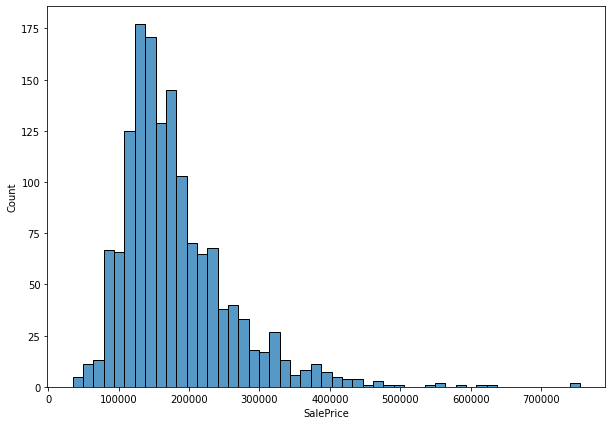

In [149]:
plt.rcParams["figure.figsize"] = (10,7)
sns.histplot(data=df, x=target)

Rigth skewed.

<AxesSubplot:>

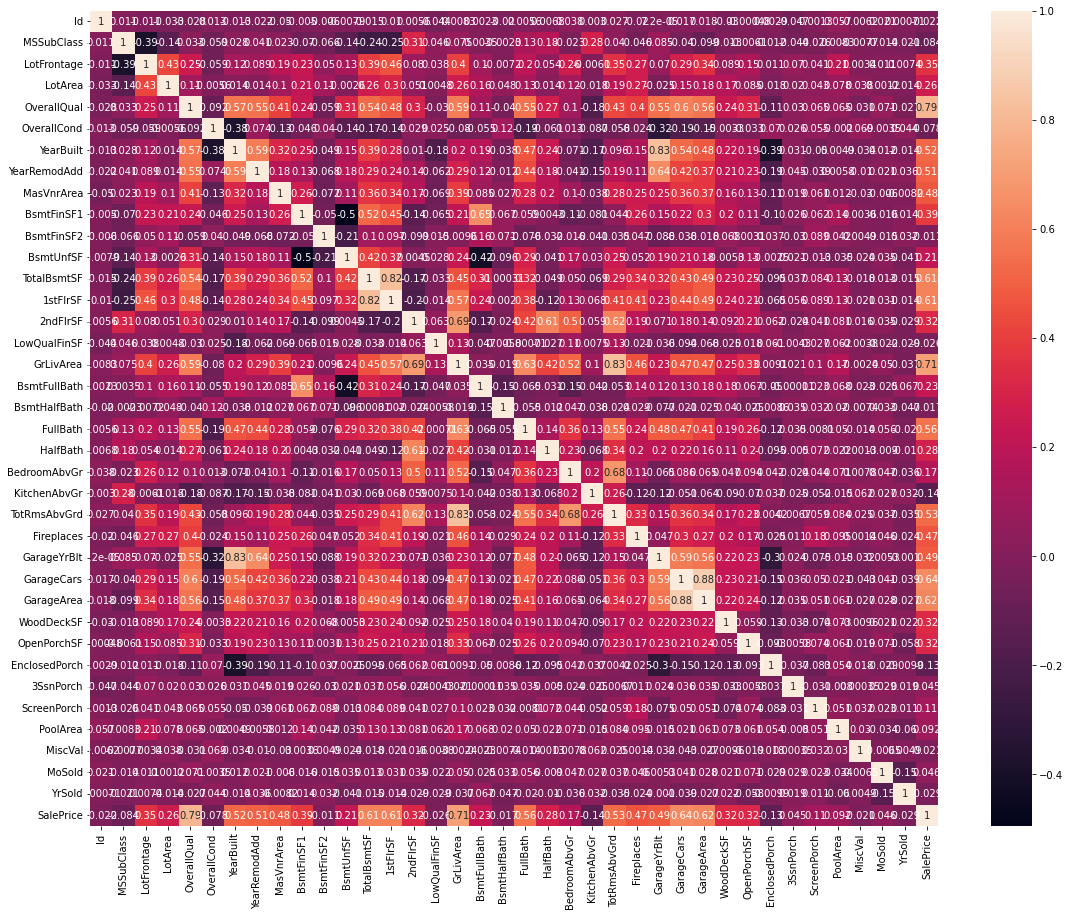

In [10]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

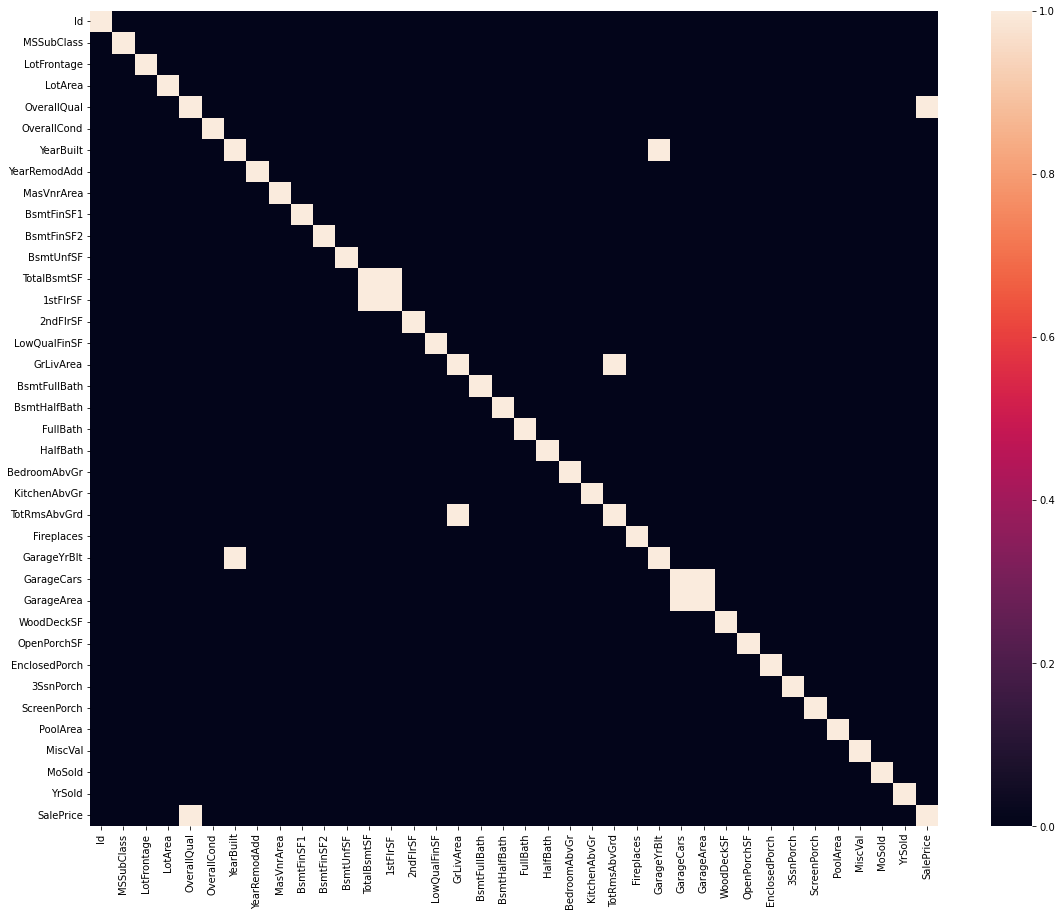

In [12]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.75)

In [152]:
def print_corr_list(data, col_target, prec=0.5):
    print(f'{col_target}:')
    corr_dict = {}
    for i in data.drop(columns = col_target).corr() :
        c = data[col_target].corr(data[i])
        if c >= prec:
            corr_dict[i] = c
    item_len = len(corr_dict)
    if item_len:
        corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))
        df=pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Corr'])
        print(df)
        print(f'({item_len})', 'variables' if item_len>1 else 'variable', 'listed.')
    else:
        print('No item found correlated.')
    print(f"Correlation threshold: {prec}")

print_corr_list(df, target)

SalePrice:
                  Corr
OverallQual   0.790982
GrLivArea     0.708624
GarageCars    0.640409
GarageArea    0.623431
TotalBsmtSF   0.613581
1stFlrSF      0.605852
FullBath      0.560664
TotRmsAbvGrd  0.533723
YearBuilt     0.522897
YearRemodAdd  0.507101
(10) variables listed.
Correlation threshold: 0.5


In [153]:
def numerical_cols(data):
    return data.select_dtypes(['number'])
    #df.select_dtypes(include=np.number)
    
def overall_corr(data, col_target, prec=0.8):
    other_cols = numerical_cols(data).drop(columns = col_target).columns  #other than target
    hi_corr = {}
    cols = other_cols.copy()        
    for col1 in other_cols:
        cols = cols[1:]         #remove the first item
        for col2 in cols:
#             print(col1, col2)
            corr = data[col1].corr(data[col2])
            if corr >= prec:
                hi_corr[col1 + ' & ' + col2] = corr
    if len(hi_corr):
        hi_corr = dict(sorted(hi_corr.items(), key=lambda item: item[1], reverse=True))
        print(pd.DataFrame.from_dict(hi_corr, orient='index', columns=['Corr']))
        
overall_corr(df, target)        

                              Corr
GarageCars & GarageArea   0.882475
YearBuilt & GarageYrBlt   0.825667
GrLivArea & TotRmsAbvGrd  0.825489
TotalBsmtSF & 1stFlrSF    0.819530


GarageArea and GarageCars are highly correlated (0.88) with each other.

In [154]:
# number of decimal values
df.select_dtypes(include=np.number).count().count()

37

In [155]:
def corr_columns(data, col_target, precision=0.5):
   print(f'Correlated Columns with {col_target}:')
   cols = [col_target]
   for i in data.select_dtypes(['number']).drop(columns = col_target):
        c=data[col_target].corr(data[i])
        if c > precision:
           cols.append(i) 
   return cols

In [156]:
corr_cols = corr_columns(df, target, 0.6)
corr_cols

Correlated Columns with SalePrice:


['SalePrice',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

### Pair plot

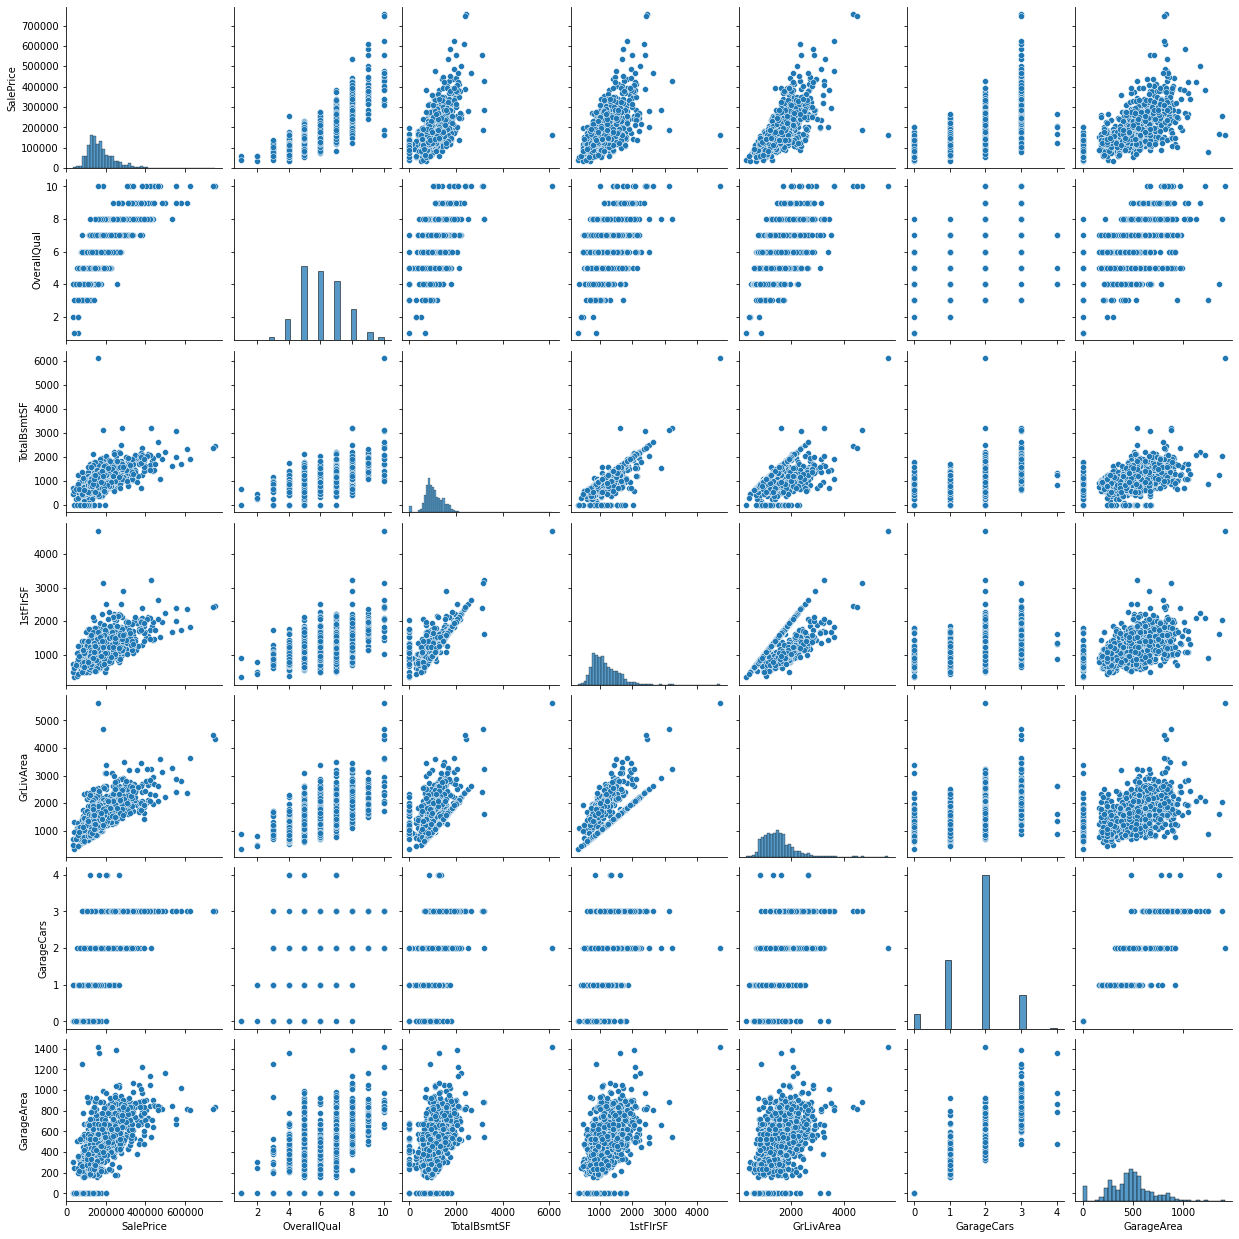

In [157]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[corr_cols])

# Data Cleaning
| [toc](#toc)<br>

## Missing Values
| [toc](#toc)<br>

A guide to deal with missing values

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [158]:
df.isnull().sum().any()

True

In [159]:
df.isnull().sum().sum()

6965

<AxesSubplot:>

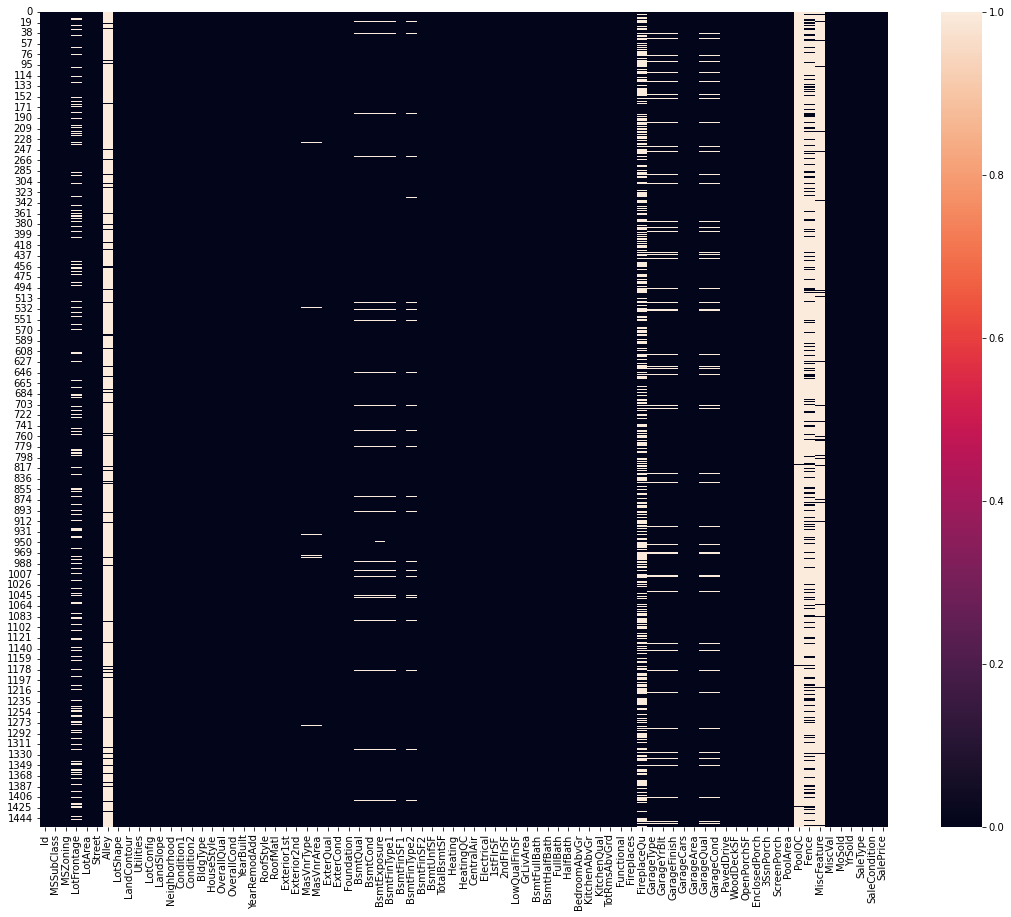

In [6]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.isnull())

In [160]:
df.shape

(1460, 80)

In [161]:
def count_na(data):
  na_list ={}
  for i in data.columns:
    cnt = data[i].isnull().sum()
    if cnt > 0:
      na_list[i] = cnt
  if len(na_list):
    na_list =dict(sorted(na_list.items(), key=lambda item: item[1], reverse=True))
  return na_list

In [162]:
count_na(df)

{'PoolQC': 1453,
 'MiscFeature': 1406,
 'Alley': 1369,
 'Fence': 1179,
 'FireplaceQu': 690,
 'LotFrontage': 259,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'BsmtExposure': 38,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

In [163]:
len(count_na(df))

19

In [164]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [165]:
df.PoolQC[df.PoolQC.isna()] = 'None'

In [166]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [167]:
df.MiscFeature[df.MiscFeature.isna()] = 'None'


In [168]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [169]:
#drop the column because it has to many NA
#df.drop("Alley",axis=1,inplace=True)

In [170]:
df.Alley[df.Alley.isna()] = 'None'

In [171]:
count_na(df)

{'Fence': 1179,
 'FireplaceQu': 690,
 'LotFrontage': 259,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'BsmtExposure': 38,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

In [172]:
df.Fence[df.Fence.isna()] = 'None'

In [173]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [174]:
df.FireplaceQu[df.FireplaceQu.isna()] = 'None'

In [175]:
count_na(df)

{'LotFrontage': 259,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'BsmtExposure': 38,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

In [176]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

The missing values in LotFrontage can be filled with median. The following article explains why:

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [177]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [178]:
count_na(df)

{'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'BsmtExposure': 38,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

We get the garage built year value from the house built year.

In [179]:
df.GarageYrBlt[df.GarageYrBlt.isna()] = df.YearBuilt[df.GarageYrBlt.isna()]

In [180]:
df.GarageType[df.GarageType.isna()] = 'None'
df.GarageFinish[df.GarageFinish.isna()] = 'None'
df.GarageQual[df.GarageQual.isna()] = 'None'
df.GarageCond[df.GarageCond.isna()] = 'None'

In [181]:
count_na(df)

{'BsmtExposure': 38,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'Electrical': 1}

In [182]:
df.BsmtExposure[df.BsmtExposure.isna()] = "None"
df.BsmtCond[df.BsmtCond.isna()] = "None"
df.BsmtQual[df.BsmtQual.isna()] = "None"
df.BsmtFinType1[df.BsmtFinType1.isna()] = "None"
df.BsmtFinType2[df.BsmtFinType2.isna()] = "None"

In [183]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [184]:
df[df.MasVnrType == 'None'].shape

(864, 80)

In [185]:
df_ = df[df.MasVnrArea.isna() | df.MasVnrType.isna() ]
(df_.MasVnrType, df_.MasVnrArea)

(234     NaN
 529     NaN
 650     NaN
 936     NaN
 973     NaN
 977     NaN
 1243    NaN
 1278    NaN
 Name: MasVnrType, dtype: object,
 234    NaN
 529    NaN
 650    NaN
 936    NaN
 973    NaN
 977    NaN
 1243   NaN
 1278   NaN
 Name: MasVnrArea, dtype: float64)

In [186]:
df.MasVnrArea.median()

0.0

In [187]:
df.MasVnrArea[df.MasVnrType.isna()] = 0.0

In [188]:
df.MasVnrType[df.MasVnrType.isna()] = 'None'

In [189]:
count_na(df)

{'Electrical': 1}

In [190]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [191]:
df.Electrical[df.Electrical.isna()] = 'SBrkr'

In [192]:
count_na(df)

{}

We have cleared all missing values by imputation.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

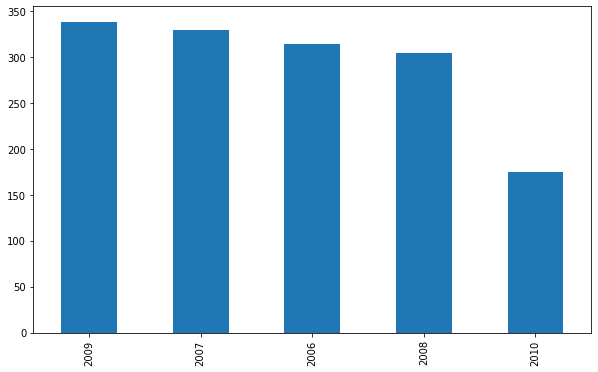

In [194]:
plt.rcParams["figure.figsize"] = (10,6)
df.YrSold.value_counts().plot.bar()

<AxesSubplot:>

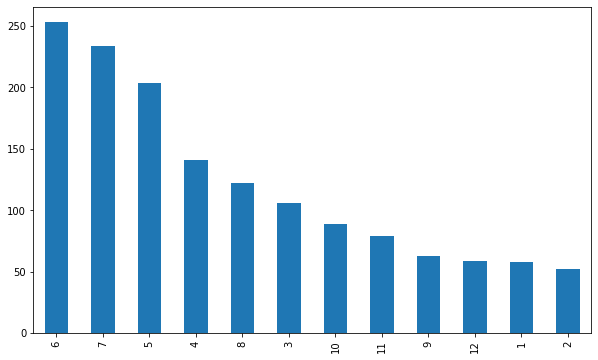

In [195]:
df.MoSold.value_counts().plot.bar()

#### Calculate Median of Prices according to Year/Month

ref: https://www.datasciencemadesimple.com/group-by-mean-in-pandas-dataframe-python-2/ 

<AxesSubplot:xlabel='YrSold'>

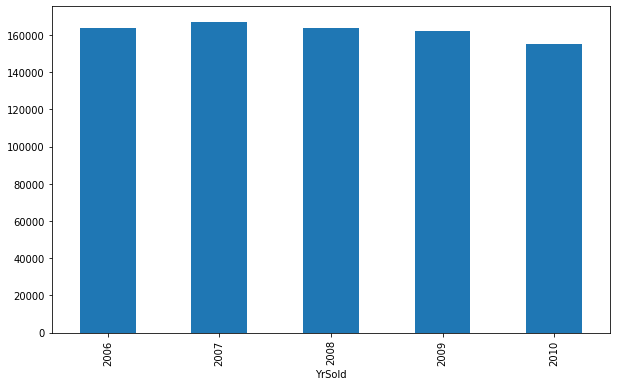

In [196]:
df.groupby(['YrSold'])['SalePrice'].median().plot.bar()

<AxesSubplot:xlabel='MoSold'>

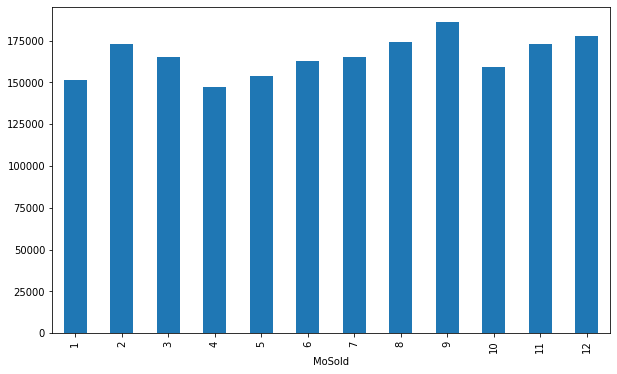

In [197]:
df.groupby(['MoSold'])['SalePrice'].median().plot.bar()

Understanding Bar plots 

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

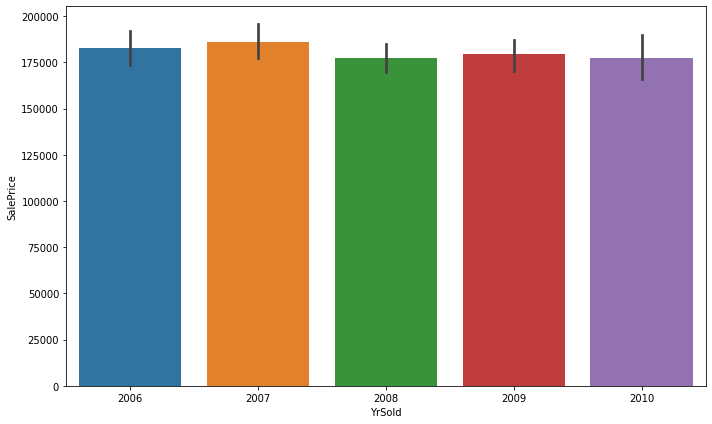

In [198]:
plt.rcParams["figure.figsize"] = (10,6)
sns.barplot(x = df['YrSold'], y = df['SalePrice'], data = df.groupby(['MoSold'])['SalePrice'].median())
#plt.xticks(rotation = 90)
plt.tight_layout()

## Refactoring the features

We will convert year and month data into string.

ref1: https://datatofish.com/integers-to-strings-dataframe/

ref2: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [199]:
df['YrSold'] = df['YrSold'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)

Similarly, some other numeric variables should be converted to string. They are:
* OverallCond 1-10
* OverallQual 1-10
* YearBuilt
* YearRemodAdd
* GarageYrBlt



In [200]:
df.OverallCond = df.OverallCond.apply(str)
df.OverallQual = df.OverallQual.apply(str)
df.YearBuilt = df.YearBuilt.apply(str)
df.YearRemodAdd = df.YearRemodAdd.apply(str)
df.GarageYrBlt = df.GarageYrBlt.apply(str)

MSSubClass includes the numbers, but they are labels. We need to change them into labels.

In [201]:
df.MSSubClass = df.MSSubClass.replace({
                20 : '1STORY_1946+',
                30 : '1STORY_1945-',
                40 : '1STORY_FIN_ATTIC',
                45 : '1+STORY_UNF',
                50 : '1+STORY_FIN',
                60 : '2STORY_1946+',
                70 : '2STORY_1945-',
                75 : '2+STORY',
                80 : 'SPL_OR_MULTI',
                85 : 'SPL_FOYER',
                90 : 'DUPL_ALL',
                120 : '1STORY_PUD_1946+',
                150 : '1+STORY_PUD',
                160 : '2STORY_PUD_1946+',
                180 : 'PUD_MULTI',
                190 : '2FAMILY_CONV'
            })
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
788,1STORY_1946+,RM,50.0,6000,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,8,2008,WD,Normal,107900
824,1STORY_1946+,FV,81.0,11216,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,6,2006,New,Partial,232600
833,1STORY_1946+,RL,100.0,10004,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2009,WD,Normal,167000
1197,2+STORY,RM,65.0,8850,Pave,None,IR1,Bnk,AllPub,Corner,...,0,None,None,None,0,7,2006,ConLw,Normal,144000
89,1STORY_1946+,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,123600
209,1STORY_1946+,RL,75.0,8250,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,7,2008,WD,Normal,145000
205,1STORY_1946+,RL,99.0,11851,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,5,2009,WD,Normal,180500
843,DUPL_ALL,RL,80.0,8000,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,7,2007,WD,Normal,141000
949,1STORY_1946+,RL,78.0,9360,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,WD,Normal,197500
1457,2STORY_1945-,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [202]:
df.MSSubClass.unique()

array(['2STORY_1946+', '1STORY_1946+', '2STORY_1945-', '1+STORY_FIN',
       '2FAMILY_CONV', '1+STORY_UNF', 'DUPL_ALL', '1STORY_PUD_1946+',
       '1STORY_1945-', 'SPL_FOYER', 'SPL_OR_MULTI', '2STORY_PUD_1946+',
       '2+STORY', 'PUD_MULTI', '1STORY_FIN_ATTIC'], dtype=object)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [204]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).count().count()

29

In [205]:
df.select_dtypes(include='object').count().count()

51

In [206]:
overview(df)

(1460, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

## Defining Important Variables

After cleaning the data, we will check correlation again.

### Correlations

In [207]:
print_corr_list(df, target)

SalePrice:
                  Corr
GrLivArea     0.708624
GarageCars    0.640409
GarageArea    0.623431
TotalBsmtSF   0.613581
1stFlrSF      0.605852
FullBath      0.560664
TotRmsAbvGrd  0.533723
(7) variables listed.
Correlation threshold: 0.5


Since this na_list includes only numeric variables, categorical variables are not shown as correlated. But we know that some categorical variables can correlate with the price of a house (e.g. MSSubClass).

### Feature Engineering

We can sum up some variables into one to increase the correlation with the price such as total living area of the house.

#### Total number of bathrooms

In [208]:
# df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)

In [209]:
# We will use this when this feature is selected as important. 
def set_TotBathrooms(df):
    df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)
    return df
df = set_TotBathrooms(df)

#### House age, Remodeled, isNew

In [210]:
# df["Age"] = df.YrSold.astype(int) - df.YearRemodAdd.astype(int)

# We will use this when this feature is selected as important. 
def set_Age(df):
    df['Age'] = df.YrSold.astype(int) - df.YearRemodAdd.astype(int)
    return df
df = set_Age(df)

In [211]:
df.Age.corr(df.SalePrice)

-0.5090787380156289

In [212]:
# df['Remodeled'] = 'No'  # init
# df.loc[df.YearBuilt < df.YearRemodAdd, 'Remodeled'] = 'Yes' 

# We will use this when this feature is selected as important. 
def set_Remodeled(df):
    df['Remodeled'] = 'No'  # init
    df.loc[df.YearBuilt < df.YearRemodAdd, 'Remodeled'] = 'Yes' 
    return df
df = set_Remodeled(df)

In [213]:
df.Remodeled.value_counts()

No     764
Yes    696
Name: Remodeled, dtype: int64

#### Total Square Feet

In [214]:
# df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF

# We will use this when this feature is selected as important. 
def set_TotalArea(df):
    df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF 
    return df
df = set_TotalArea(df)

In [215]:
df.TotalArea.corr(df.SalePrice)

0.7789588289942265

## Drop correlated variables

In [216]:
overall_corr(df, target)

                              Corr
GarageCars & GarageArea   0.882475
GrLivArea & TotalArea     0.880324
GrLivArea & TotRmsAbvGrd  0.825489
TotalBsmtSF & TotalArea   0.822888
TotalBsmtSF & 1stFlrSF    0.819530


We should decide to drop one of:
- GarageCars and GarageArea.
- GrLivArea and TotalArea

In [217]:
print_corr_list(df, target)

SalePrice:
                  Corr
TotalArea     0.778959
GrLivArea     0.708624
GarageCars    0.640409
TotBathrooms  0.631731
GarageArea    0.623431
TotalBsmtSF   0.613581
1stFlrSF      0.605852
FullBath      0.560664
TotRmsAbvGrd  0.533723
(9) variables listed.
Correlation threshold: 0.5


<AxesSubplot:>

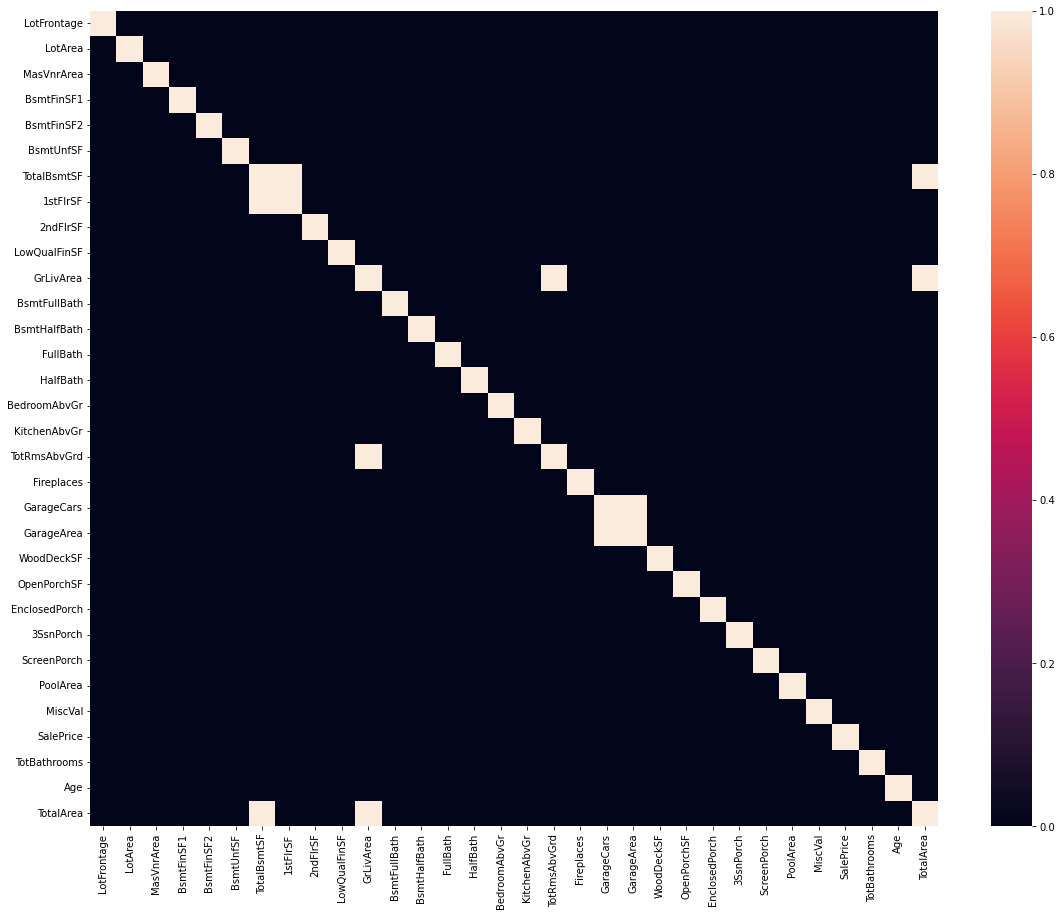

In [218]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.8)

We will drop GarageArea (0.62) because it is less correlated with the price.

In [219]:
df_ = df.copy()     # we will use this for tree algorithms
df.drop(columns=['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'] , inplace=True)

In [220]:
df.GrLivArea.corr(df.TotalArea)

0.8803239594943535

In [221]:
print_corr_list(df, target, 0.7)

SalePrice:
               Corr
TotalArea  0.778959
GrLivArea  0.708624
(2) variables listed.
Correlation threshold: 0.7


## Outliers

### Visualize data for outliers

In [222]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

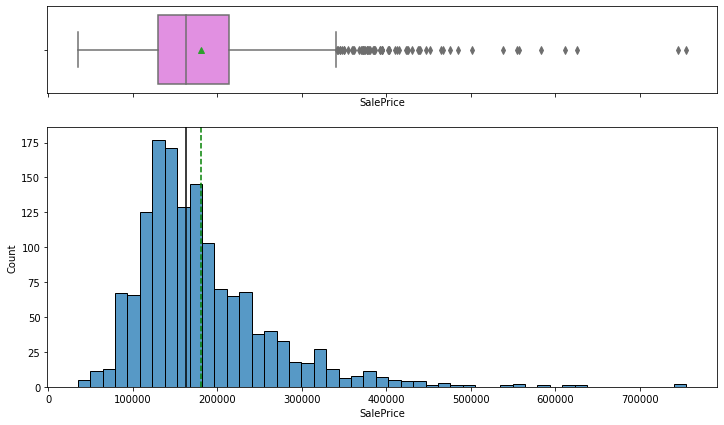

In [223]:
histogram_boxplot(df, target)

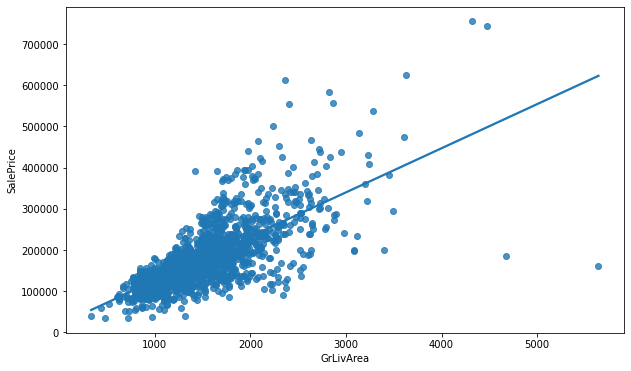

In [224]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

There are 4 outliers seen in the figure above. Those are the ones with high sales price and high living area. We can get rid of them with a simple formula:

In [225]:
df = df[df.GrLivArea < 4000]
df_ = df_[df_.GrLivArea < 4000]

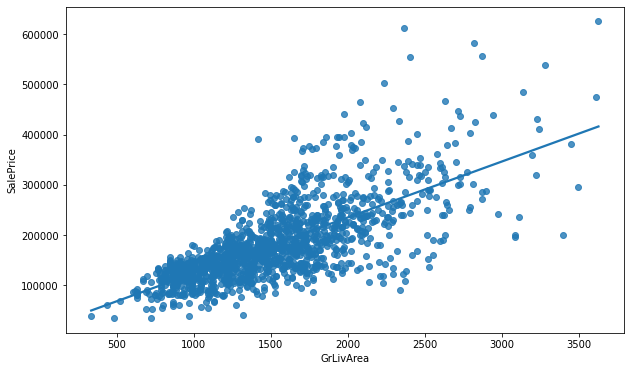

In [226]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

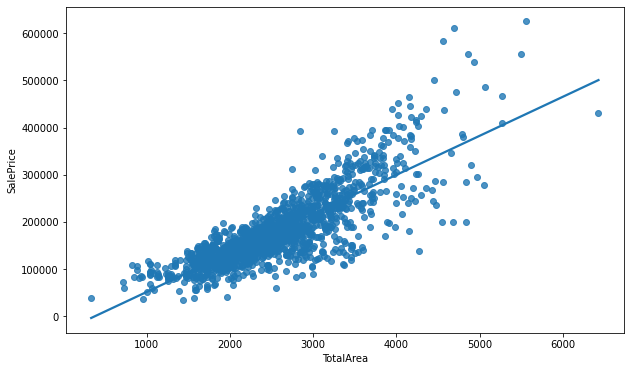

In [227]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.TotalArea, y = target, data = df, ci = None);

In [228]:
# df = df[df.TotalArea< 7500]
# df_ = df_[df_.TotalArea< 7500]

<AxesSubplot:xlabel='TotBathrooms', ylabel='SalePrice'>

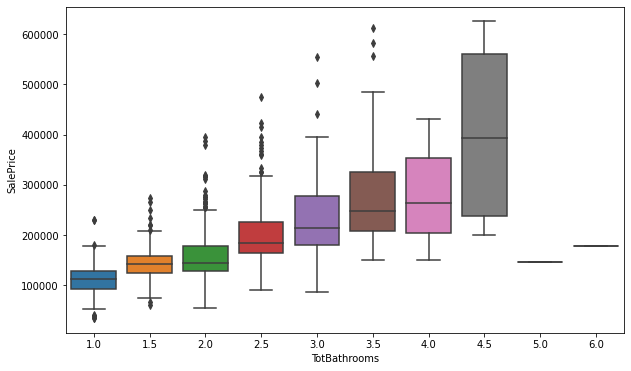

In [229]:
sns.boxplot(x='TotBathrooms', y=target, data=df)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

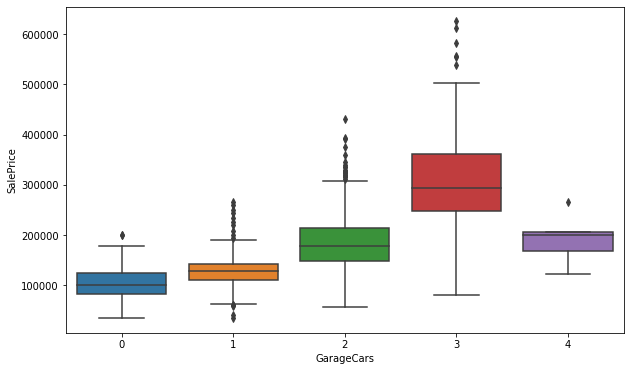

In [230]:
sns.boxplot(x='GarageCars', y=target, data=df) 

# Preprocessing Data

Modeling with numeric variables vs. Modeling with dummies?

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
df1_numeric = df.select_dtypes(include=numerics)
X1 = df1_numeric.drop(target,axis=1)
y1 = df1_numeric[target]

In [233]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [234]:
df2_dummies = pd.get_dummies(df,drop_first=True)
X2 = df2_dummies.drop(target,axis=1)
y2 = df2_dummies[target]

In [235]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

# Modeling

## Linear Regression

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def validate(y_train, y_train_pred, y_test, y_pred, label):
    scores = {
            label+" train": {
                "R2" : f"{r2_score(y_train, y_train_pred):.3f}",
                "mae" : f"{mean_absolute_error(y_train, y_train_pred):.3f}",
                "mse" : f"{mean_squared_error(y_train, y_train_pred):.3f}",                          
                "rmse" : f"{np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}"
                },
            label+" test": {
                "R2" : f"{r2_score(y_test, y_pred):.3f}",
                "mae" : f"{mean_absolute_error(y_test, y_pred):.3f}",
                "mse" : f"{mean_squared_error(y_test, y_pred):.3f}",
                "rmse" : f"{np.sqrt(mean_squared_error(y_test, y_pred)):.3f}"
                }
            }    
    return pd.DataFrame(scores)

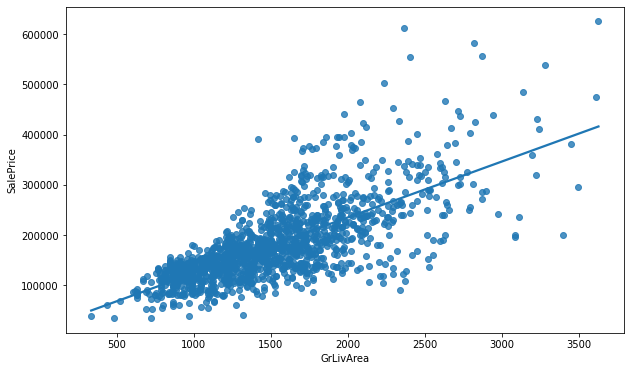

In [238]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

In [239]:
lin1_model = LinearRegression()
lin1_model.fit(X1_train, y1_train)

LinearRegression()

In [240]:
lin2_model = LinearRegression()
lin2_model.fit(X2_train, y2_train)

LinearRegression()

In [241]:
y1test_pred = lin1_model.predict(X1_test)
y1train_pred = lin1_model.predict(X1_train)

In [242]:
y2test_pred = lin2_model.predict(X2_test)
y2train_pred = lin2_model.predict(X2_train)

### Evaluate Results

In [243]:
t1 = validate(y1_train, y1train_pred, y1_test, y1test_pred, "linear(numeric)")
t1

,linear(numeric) train,linear(numeric) test
R2,0.831,0.812
mae,22111.380,23995.758
mse,986300242.026,1137323624.908
rmse,31405.417,33724.229


In [244]:
t2 = validate(y2_train, y2train_pred, y2_test, y2test_pred, "linear(dummies)")
t2

,linear(dummies) train,linear(dummies) test
R2,0.961,0.822
mae,9935.161,21750.065
mse,225666331.989,1080196145.233
rmse,15022.195,32866.338


In [245]:
tAll = t1

## Linear Regression with Normalization

See: https://www.baeldung.com/cs/normalization-vs-standardization

In [246]:
from sklearn.preprocessing import MinMaxScaler

In [247]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [248]:
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

In [249]:
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [250]:
lin1scaled_model = LinearRegression()
lin1scaled_model.fit(X1_train_scaled, y1_train)

LinearRegression()

In [251]:
y1testscaled_pred = lin1scaled_model.predict(X1_test_scaled)
y1trainscaled_pred = lin1scaled_model.predict(X1_train_scaled)

In [252]:
lin2scaled_model = LinearRegression()
lin2scaled_model.fit(X2_train_scaled, y2_train)

LinearRegression()

In [253]:
y2testscaled_pred = lin2scaled_model.predict(X2_test_scaled)
y2trainscaled_pred = lin2scaled_model.predict(X2_train_scaled)

### Evaluate Results

In [254]:
t1scaled = validate(y1_train, y1trainscaled_pred, y1_test, y1testscaled_pred, "linear(numeric-scaled)")
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.079,23994.887
mse,986296596.324,1137273346.584
rmse,31405.359,33723.484


In [255]:
t2scaled = validate(y2_train, y2trainscaled_pred, y2_test, y2testscaled_pred, "linear(dummies-scaled)")
t2scaled

,linear(dummies-scaled) train,linear(dummies-scaled) test
R2,0.961,-44564900293790504.000
mae,9935.197,3036497866625.418
mse,225666365.799,270036030413054423435575296.000
rmse,15022.196,16432773059135.650


## Cross-Validation

In [256]:
from sklearn.model_selection import cross_validate, cross_val_score

In [257]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [258]:
model = LinearRegression()
scores = cross_validate(model, X1_train_scaled, y1_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [259]:
pd.DataFrame(scores).mean()

fit_time                            4.206061e-03
score_time                          2.204370e-03
test_r2                             8.130831e-01
test_neg_mean_absolute_error       -2.283351e+04
test_neg_mean_squared_error        -1.056393e+09
test_neg_root_mean_squared_error   -3.221576e+04
dtype: float64

### Evaluate Results

In [260]:
t1CV = pd.DataFrame(scores).iloc[:, 2:].mean()
t1CV

test_r2                             8.130831e-01
test_neg_mean_absolute_error       -2.283351e+04
test_neg_mean_squared_error        -1.056393e+09
test_neg_root_mean_squared_error   -3.221576e+04
dtype: float64

We see that linear regression with scaled numeric data has better results.

In [261]:
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.079,23994.887
mse,986296596.324,1137273346.584
rmse,31405.359,33723.484


In [262]:
# add preferred to compare with others
pd.concat([tAll, t1scaled], axis=1)

,linear(numeric) train,linear(numeric) test,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22111.079,23994.887
mse,986300242.026,1137323624.908,986296596.324,1137273346.584
rmse,31405.417,33724.229,31405.359,33723.484


## Lasso Regression

In [263]:
from sklearn.linear_model import Lasso, LassoCV

In [264]:
lasso_model = Lasso(alpha=10, random_state=101)
lasso_model.fit(X1_train_scaled, y1_train)

Lasso(alpha=10, random_state=101)

In [265]:
y3_pred = lasso_model.predict(X1_test_scaled)
y3_train_pred = lasso_model.predict(X1_train_scaled)

### Evaluation

In [266]:
t3lasso = validate(y1_train, y3_train_pred, y1_test, y3_pred, "lasso")
t3lasso

,lasso train,lasso test
R2,0.831,0.812
mae,22089.078,23984.454
mse,986492786.350,1136463862.789
rmse,31408.483,33711.480


In [267]:
pd.concat([tAll, t3lasso], axis=1)

,linear(numeric) train,linear(numeric) test,lasso train,lasso test
R2,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22089.078,23984.454
mse,986300242.026,1137323624.908,986492786.350,1136463862.789
rmse,31405.417,33724.229,31408.483,33711.480


## Cross-Validation for Lasso

In [268]:
model = Lasso(alpha=1, random_state=101)
scores = cross_validate(model, X1_train_scaled, y1_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [269]:
t3lassoCV = pd.DataFrame(scores).iloc[:, 2:].mean()
t3lassoCV

test_r2                             8.137723e-01
test_neg_mean_absolute_error       -2.278499e+04
test_neg_mean_squared_error        -1.053869e+09
test_neg_root_mean_squared_error   -3.216743e+04
dtype: float64

In [270]:
t1scaled

,linear(numeric-scaled) train,linear(numeric-scaled) test
R2,0.831,0.812
mae,22111.079,23994.887
mse,986296596.324,1137273346.584
rmse,31405.359,33723.484


### Grid Search for Alpha

In [271]:
alpha_space = np.linspace(9.9, 10, 100)
alpha_space

array([ 9.9       ,  9.9010101 ,  9.9020202 ,  9.9030303 ,  9.9040404 ,
        9.90505051,  9.90606061,  9.90707071,  9.90808081,  9.90909091,
        9.91010101,  9.91111111,  9.91212121,  9.91313131,  9.91414141,
        9.91515152,  9.91616162,  9.91717172,  9.91818182,  9.91919192,
        9.92020202,  9.92121212,  9.92222222,  9.92323232,  9.92424242,
        9.92525253,  9.92626263,  9.92727273,  9.92828283,  9.92929293,
        9.93030303,  9.93131313,  9.93232323,  9.93333333,  9.93434343,
        9.93535354,  9.93636364,  9.93737374,  9.93838384,  9.93939394,
        9.94040404,  9.94141414,  9.94242424,  9.94343434,  9.94444444,
        9.94545455,  9.94646465,  9.94747475,  9.94848485,  9.94949495,
        9.95050505,  9.95151515,  9.95252525,  9.95353535,  9.95454545,
        9.95555556,  9.95656566,  9.95757576,  9.95858586,  9.95959596,
        9.96060606,  9.96161616,  9.96262626,  9.96363636,  9.96464646,
        9.96565657,  9.96666667,  9.96767677,  9.96868687,  9.96

In [272]:
model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=101)

In [273]:
model.fit(X1_train_scaled, y1_train)

LassoCV(alphas=array([ 9.9       ,  9.9010101 ,  9.9020202 ,  9.9030303 ,  9.9040404 ,
        9.90505051,  9.90606061,  9.90707071,  9.90808081,  9.90909091,
        9.91010101,  9.91111111,  9.91212121,  9.91313131,  9.91414141,
        9.91515152,  9.91616162,  9.91717172,  9.91818182,  9.91919192,
        9.92020202,  9.92121212,  9.92222222,  9.92323232,  9.92424242,
        9.92525253,  9.92626263,  9.92727273,  9.92828283,  9.92929293,
        9.9303030...
        9.97070707,  9.97171717,  9.97272727,  9.97373737,  9.97474747,
        9.97575758,  9.97676768,  9.97777778,  9.97878788,  9.97979798,
        9.98080808,  9.98181818,  9.98282828,  9.98383838,  9.98484848,
        9.98585859,  9.98686869,  9.98787879,  9.98888889,  9.98989899,
        9.99090909,  9.99191919,  9.99292929,  9.99393939,  9.99494949,
        9.9959596 ,  9.9969697 ,  9.9979798 ,  9.9989899 , 10.        ]),
        cv=10, max_iter=100000, random_state=101)

In [274]:
best_alpha = model.alpha_
best_alpha

9.994949494949495

In [275]:
y4_pred = model.predict(X1_test_scaled)   #Lasso(alpha =9.994)
y4_train_pred = model.predict(X1_train_scaled)

In [276]:
t3gridCV = validate(y1_train, y4_train_pred, y1_test, y4_pred, "lasso_gridCV")
t3gridCV

,lasso_gridCV train,lasso_gridCV test
R2,0.831,0.812
mae,22088.967,23984.560
mse,986492565.682,1136450652.004
rmse,31408.479,33711.284


In [277]:
tAll = pd.concat([t1,t1scaled, t3lasso, t3gridCV], axis = 1)
tAll

,linear(numeric) train,linear(numeric) test,linear(numeric-scaled) train,linear(numeric-scaled) test,lasso train,lasso test,lasso_gridCV train,lasso_gridCV test
R2,0.831,0.812,0.831,0.812,0.831,0.812,0.831,0.812
mae,22111.380,23995.758,22111.079,23994.887,22089.078,23984.454,22088.967,23984.560
mse,986300242.026,1137323624.908,986296596.324,1137273346.584,986492786.350,1136463862.789,986492565.682,1136450652.004
rmse,31405.417,33724.229,31405.359,33723.484,31408.483,33711.480,31408.479,33711.284


## One more try with Linear

In [278]:
d3_GrLivArea = df[['GrLivArea']]
X3 = df[['GrLivArea']]
y3 = df[target]


In [279]:
X3.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [280]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

In [281]:
lin3_model = LinearRegression()
lin3_model.fit(X3_train, y3_train)

LinearRegression()

In [282]:
y5_pred = lin3_model.predict(X3_test)   #Lasso(alpha =9.994)
y5_train_pred = lin3_model.predict(X3_train)

In [283]:
validate(y3_train, y5_train_pred, y3_test,y5_pred, "Single Linear")

,Single Linear train,Single Linear test
R2,0.502,0.584
mae,37401.491,35300.771
mse,2903741588.094,2521842073.938
rmse,53886.377,50217.946


## kNN Regression

* See: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [284]:
from sklearn.neighbors import KNeighborsRegressor

### Choosing best data for KNN 

In [285]:
knn1_model = KNeighborsRegressor(n_neighbors=5)    #with numeric
knn2_model = KNeighborsRegressor(n_neighbors=5)     #dummies

In [286]:
knn1_model.fit(X1_train_scaled, y1_train)
knn2_model.fit(X2_train_scaled, y2_train)

KNeighborsRegressor()

In [287]:
y1_pred = knn1_model.predict(X1_test_scaled)
y1train_pred = knn1_model.predict(X1_train_scaled)

y2_pred = knn2_model.predict(X2_test_scaled)
y2train_pred = knn2_model.predict(X2_train_scaled)

In [288]:
t1KNN = validate(y1_train, y1train_pred, y1_test, y1_pred, 'KNN numeric')
t2KNN = validate(y2_train, y2train_pred, y2_test, y2_pred, 'KNN dummies')

In [289]:
pd.concat([t1KNN, t2KNN], axis=1)

,KNN numeric train,KNN numeric test,KNN dummies train,KNN dummies test
R2,0.880,0.802,0.839,0.720
mae,17359.563,23687.358,19646.987,25834.423
mse,700747482.102,1202535409.442,936547396.924,1699247647.084
rmse,26471.635,34677.592,30603.062,41221.932


We will continue with numeric variables.

In [290]:
tAll = pd.concat([tAll, t1KNN], axis=1)

### Elbow method

In [291]:
from math import sqrt

In [292]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X1_train_scaled, y1_train)  #fit the model
    pred = model.predict(X1_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)
print(min(rmse_val))

151473.00480616337


<AxesSubplot:>

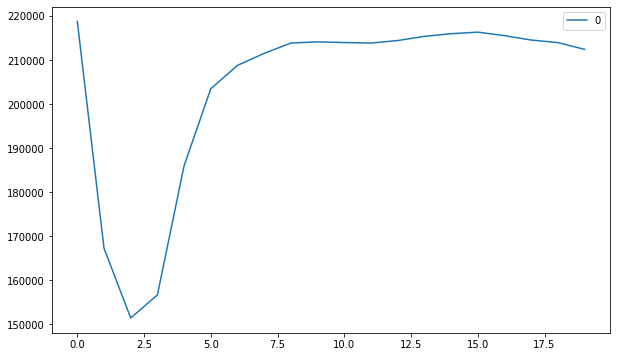

In [293]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

K = 2

In [294]:
knn_model = KNeighborsRegressor(n_neighbors=2)    #with numeric
knn_model.fit(X1_train_scaled, y1_train)

y1_pred = knn_model.predict(X1_test_scaled)

In [295]:
tKNN = validate(y1_train, y1train_pred, y1_test, y1_pred, 'KNN numeric')

In [296]:
pd.concat([t1KNN, tKNN], axis=1)

,KNN numeric train,KNN numeric test,KNN numeric train,KNN numeric test
R2,0.880,0.802,0.880,0.806
mae,17359.563,23687.358,17359.563,24405.219
mse,700747482.102,1202535409.442,700747482.102,1174814894.699
rmse,26471.635,34677.592,26471.635,34275.573


We will not get this into our solution repository.

## Adaboost Regression

Tree model summarization.
- [ref] : https://towardsdatascience.com/adaboost-algorithm-remarkably-capable-but-with-one-interesting-limitation-cf95905bf8a0

In [ ]:
# ============= Model summary ================
def summarize(model, X, y, X_val, y_val, name='Model'):
    clf = model.fit(X, y)
    pred_labels = model.predict(X)
    pred_labels_val = model.predict(X_val)

    print('='*15,'Model Summary','='*15)
    print('No. of classes: ', clf.n_classes_)
    print('Classes: ', clf.classes_)
    print('No. of Estimators: ', len(clf.estimators_))
    print('Base Estimator: ', clf.base_estimator_)
    print('-'*40)
    print(" ")

    print('='*15,'Evaluation on Test Data','='*15)
    score_val = model.score(X_val, y_val)
    print('Accuracy: ', score_val)
    # Look at classification report to evaluate the model
    print(classification_report(y_val, pred_labels_val))
    print('-'*40)
    print(" ")

    print('='*15,'Evaluation on Train Data','='*15)
    score = model.score(X, y)
    print('Accuracy: ', score)
    # Look at classification report to evaluate the model
    print(classification_report(y, pred_labels))
    print('-'*40)

In [297]:
from sklearn.preprocessing import OrdinalEncoder

In [298]:
X = df_.drop(target, axis=1)
y = df_[target]

In [299]:
cat = X.select_dtypes("object").columns
cat

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'Remodeled'],
      dtype='object')

In [300]:
# cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
      #  'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
      #  'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
      #  'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
      #  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
      #  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
      #  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
      #  'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
      #  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
      #  'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
      #  'SaleCondition']

In [301]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,Age,Remodeled,TotalArea
0,9.0,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,1.0,0,4.0,2.0,8.0,4.0,3.5,5,0.0,2566
1,3.0,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,1.0,0,7.0,1.0,8.0,4.0,2.5,31,0.0,2524
2,9.0,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,1.0,0,11.0,2.0,8.0,4.0,3.5,6,1.0,2706
3,8.0,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,1.0,0,4.0,0.0,8.0,0.0,2.0,36,1.0,2473
4,9.0,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,1.0,0,3.0,2.0,8.0,4.0,3.5,8,0.0,3343


In [302]:
from sklearn.ensemble import AdaBoostRegressor

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [304]:
#max_depth=1 is not enough
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [305]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [306]:
y_pred = ada_model.predict(X_test)
ytrain_pred = ada_model.predict(X_train)

In [307]:
tAda = validate(y_train, ytrain_pred, y_test, y_pred, "Adaboost")
tAda

,Adaboost train,Adaboost test
R2,0.892,0.816
mae,19673.156,23796.932
mse,631556870.278,1112332117.926
rmse,25130.795,33351.643


### Cross-validate Adaboost

In [308]:
# from sklearn.model_selection import cross_validate, cross_val_score
# model = AdaBoostRegressor(random_state=101, n_estimators=50)
# scores = cross_validate(model, X_train, y_train, scoring=['r2', 
#             'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
# pd.DataFrame(scores)
# pd.DataFrame(scores).mean()[2:]

<code>
test_r2                             8.249063e-01
test_neg_mean_absolute_error       -2.218880e+04
test_neg_mean_squared_error        -9.887217e+08
test_neg_root_mean_squared_error   -3.119833e+04
dtype: float64
    </code>

In [309]:
from sklearn.tree import plot_tree

In [310]:
model = AdaBoostRegressor(random_state=101, n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

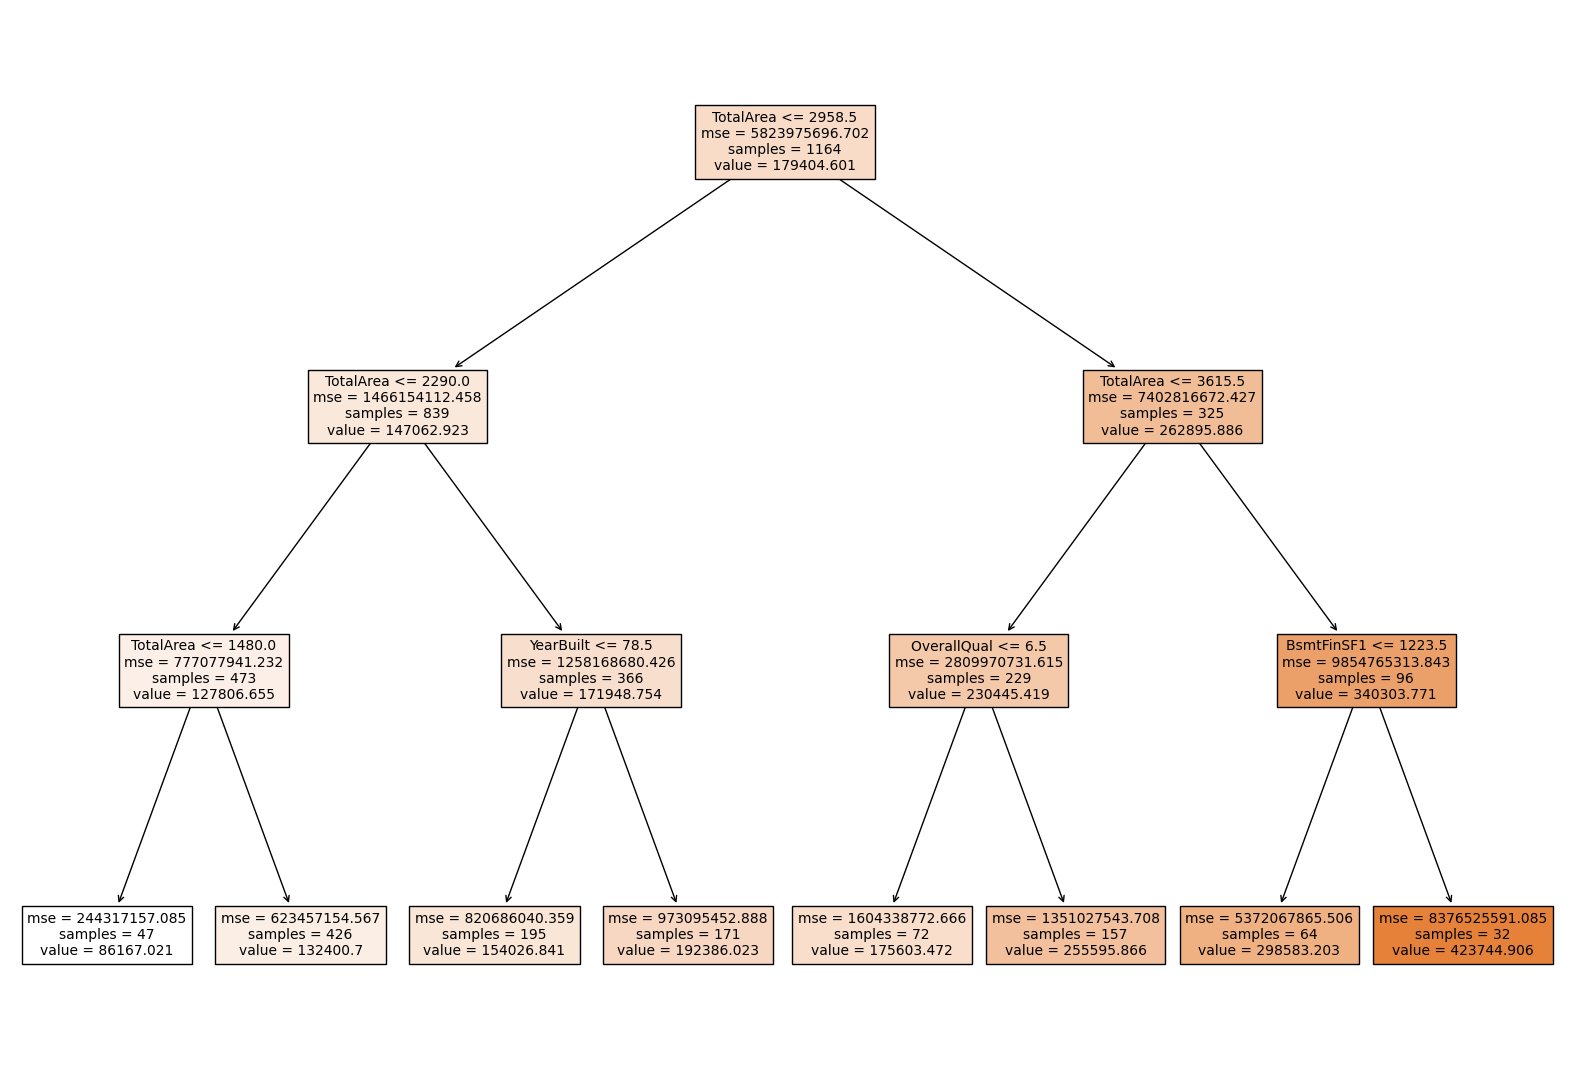

In [311]:
# features = na_list(X.columns)
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

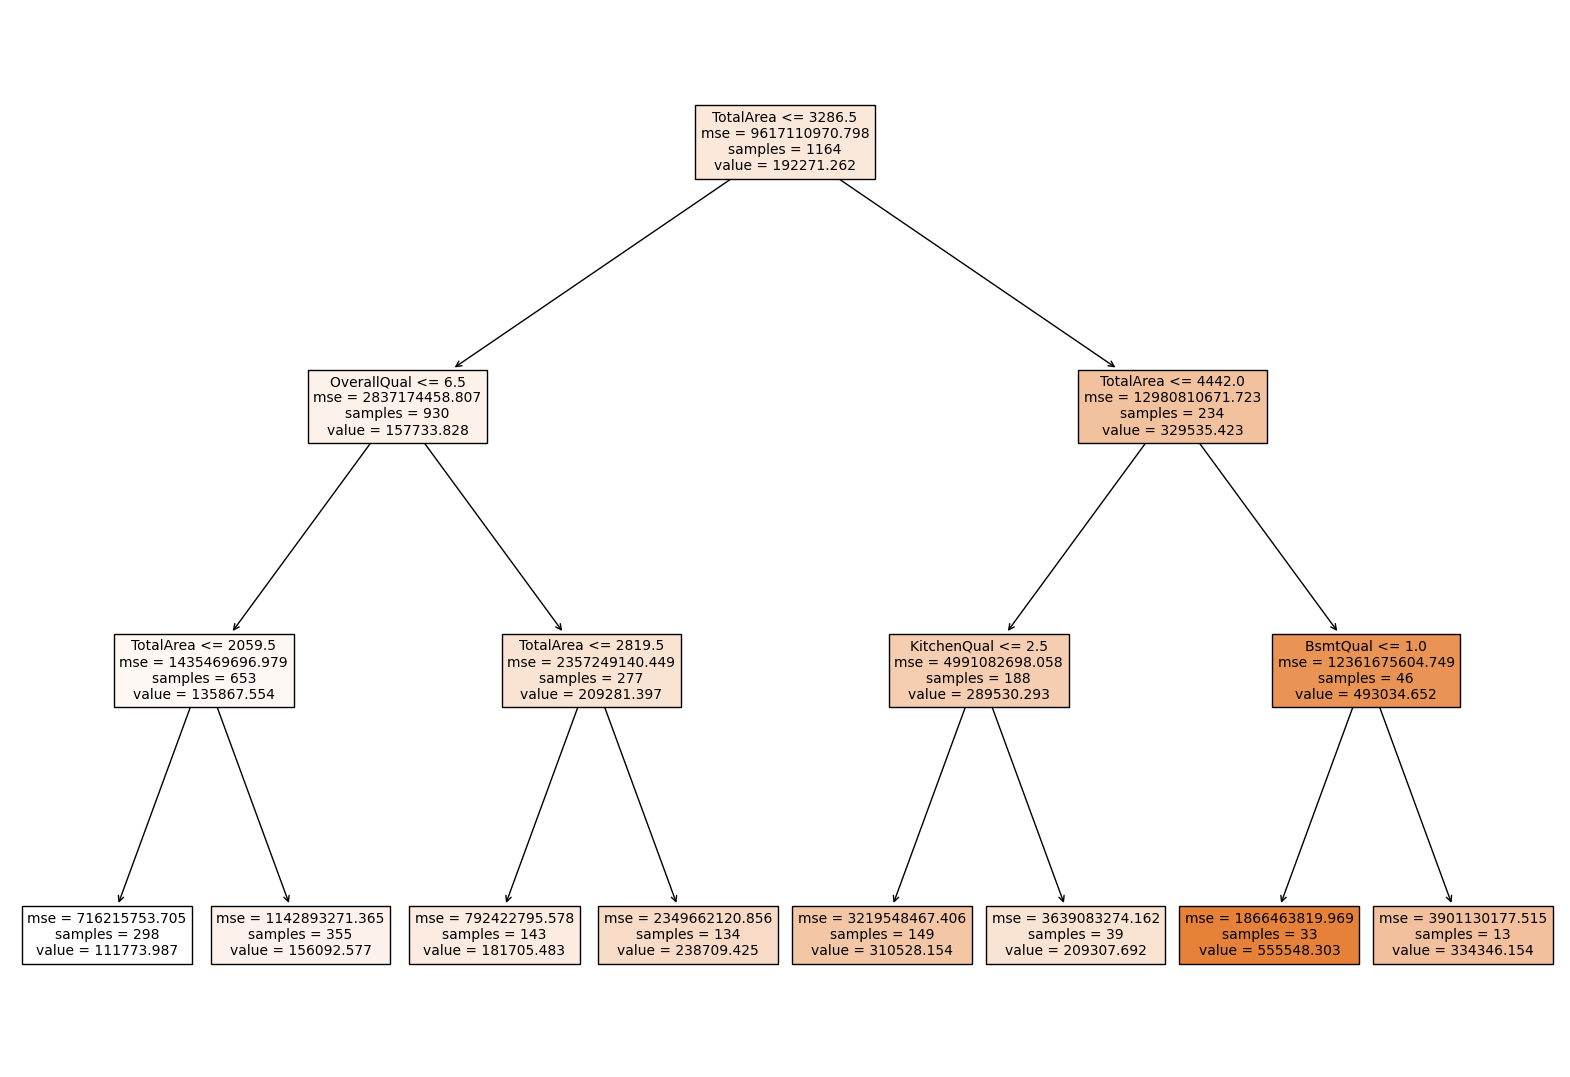

In [312]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

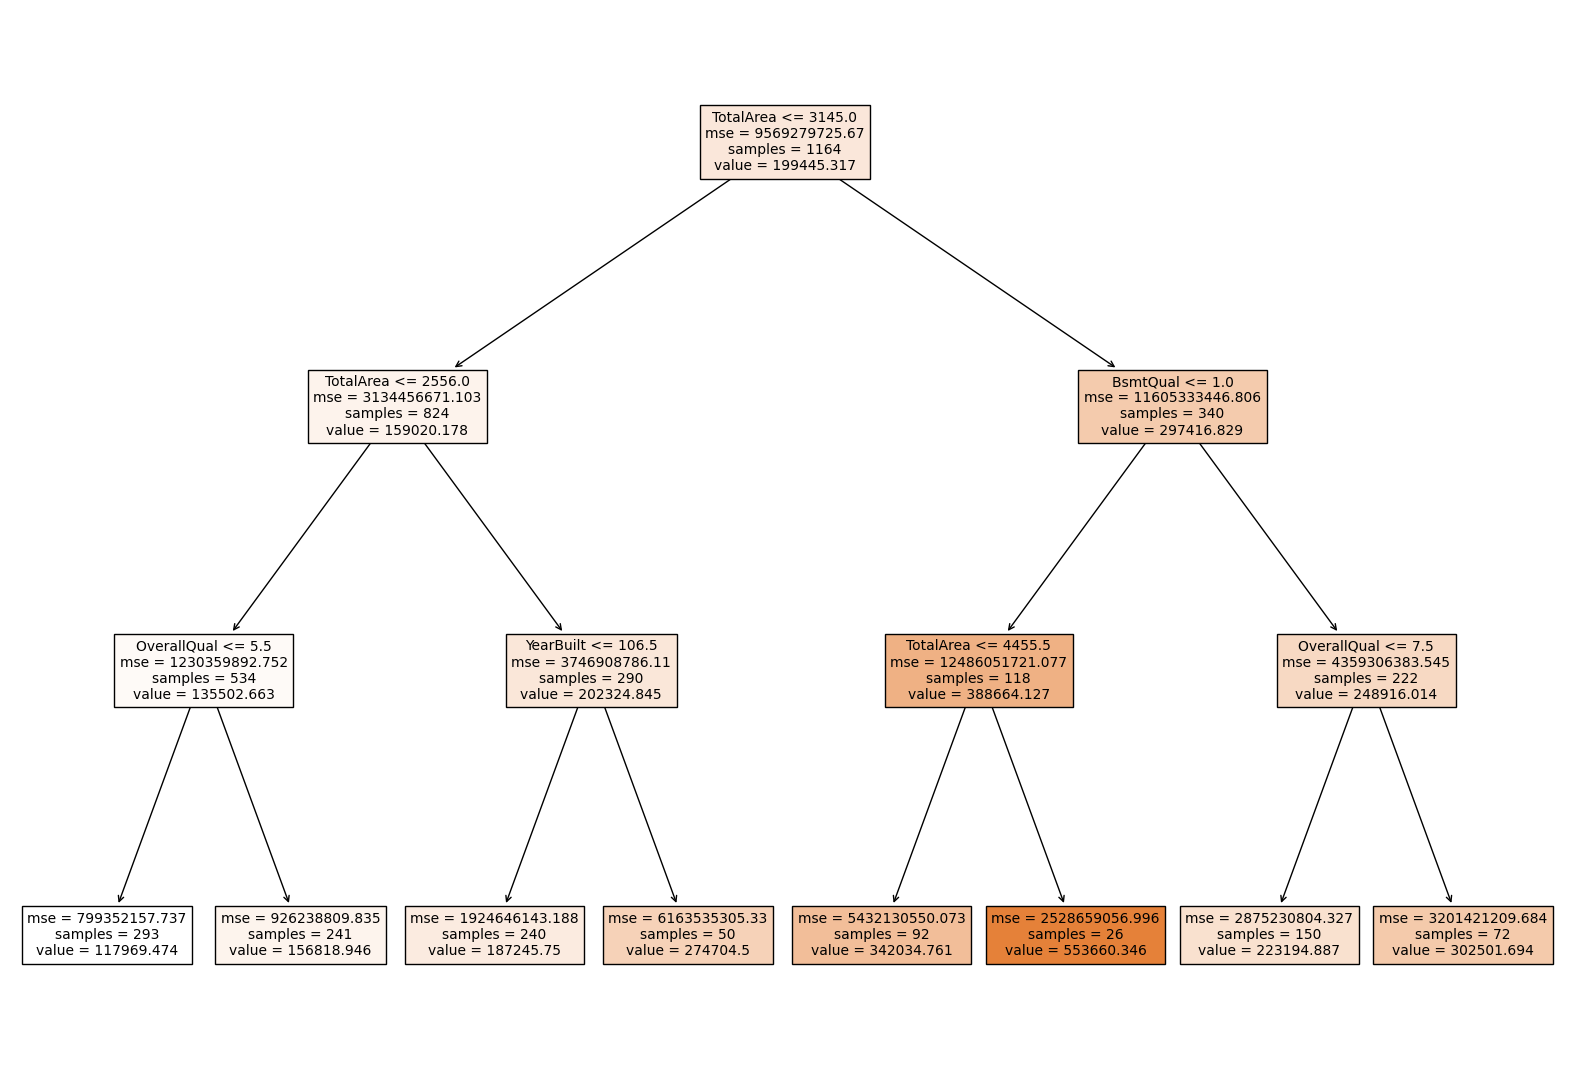

In [313]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

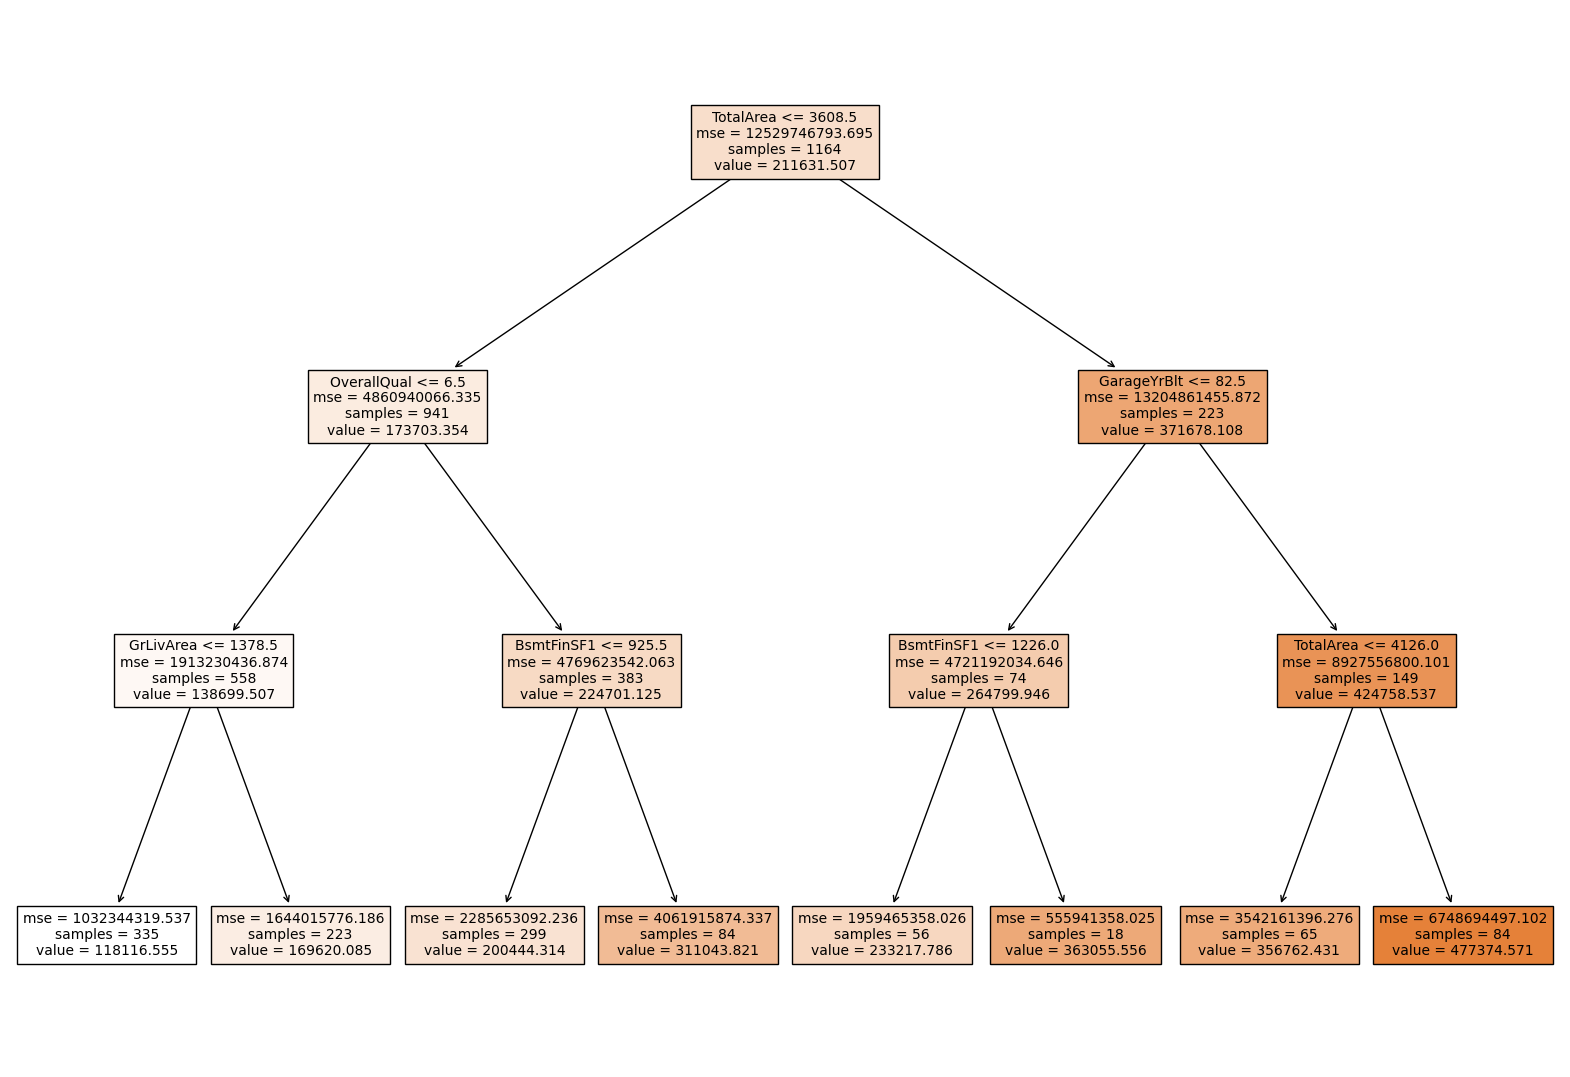

In [314]:
plt.figure(figsize=(20,14),dpi=100)
plot_tree(model.estimators_[3], filled=True, feature_names=X.columns, fontsize=10);

### Grid Search Adaboost

In [315]:
from sklearn.model_selection import GridSearchCV

In [316]:
param_grid = {"n_estimators":[
                        50,              #tried 
                        75,
                        100,               #BEST
                        125,
                        150,
#                         200, 300, 500    #tried
                        ],
              "learning_rate":[
                      0.1,            #tried
                      0.2,
                      0.4,
#                           0.5, 0.8,      #tried
                      1,
                      1.2,
                      1.5, 2,
              ],
              "loss": [
                      "linear", 
#                        "square"         #tried
                      ]
            }

In [317]:
# model = AdaBoostRegressor(random_state=101)
# grid_model = GridSearchCV(estimator=model,
#                           param_grid=param_grid,
#                           scoring='neg_root_mean_squared_error',
#                           cv=10,
#                           n_jobs = -1)

In [318]:
# grid_model.fit(X_train,y_train)

In [319]:
# grid_model.best_params_

<code>
   {'learning_rate': 0.4, 'loss': 'linear', 'n_estimators': 100}
</code>

In [320]:
# grid_model.best_score_

-30564.71506720788

In [321]:
# y_pred = grid_model.predict(X_test)
# ytrain_pred = grid_model.predict(X_train)

In [322]:
# tAdaGrid = validate(y_train, ytrain_pred, y_test, y_pred, "Adaboost Best Params")
# tAdaGrid

<code>
    Adaboost Best Params train	Adaboost Best Params test
R2		0.887					0.818
mae		20244.298				24131.258
mse		659212465.334			1104374165.579
rmse		25675.133				33232.126
    </code>
    

In [323]:
# pd.concat([tAda, tAdaGrid], axis=1)

<code>
                |Adaboost train | Adaboost test | Adaboost Best Params train | Adaboost Best Params test|
---------------------------------------------------------------------------------------------------------   
|R2             |0.892         |0.816           |0.887                       |0.818                     |
|mae            |19673.156     |23796.932       |20244.298                   |24131.258                 |
|mse            |631556870.278 |1112332117.926  |659212465.334               |1104374165.579            |
|rmse           |25130.795     |33351.643       |25675.133                   |33232.126                 |
    </code>

### Feature Selection

In [324]:
# grid_model.best_params_

{'learning_rate': 0.4, 'loss': 'linear', 'n_estimators': 100}

In [325]:
model = AdaBoostRegressor(random_state=101,n_estimators=100, learning_rate=0.4, loss='linear')
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=100, random_state=101)

In [326]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
TotalArea,0.544178
TotBathrooms,0.067099
BsmtQual,0.061402
YearBuilt,0.051086
BsmtFinSF1,0.050598
...,...
GarageType,0.000000
RoofStyle,0.000000
OverallCond,0.000000
HouseStyle,0.000000


In [327]:
threshold = 0.001
ada_features = ada_imp_feats[ada_imp_feats.ada_Importance > threshold]
ada_features

,ada_Importance
TotalArea,0.544178
TotBathrooms,0.067099
BsmtQual,0.061402
YearBuilt,0.051086
BsmtFinSF1,0.050598
OverallQual,0.050380
MasVnrArea,0.020026
Age,0.019901
ExterQual,0.018050
LotArea,0.013854


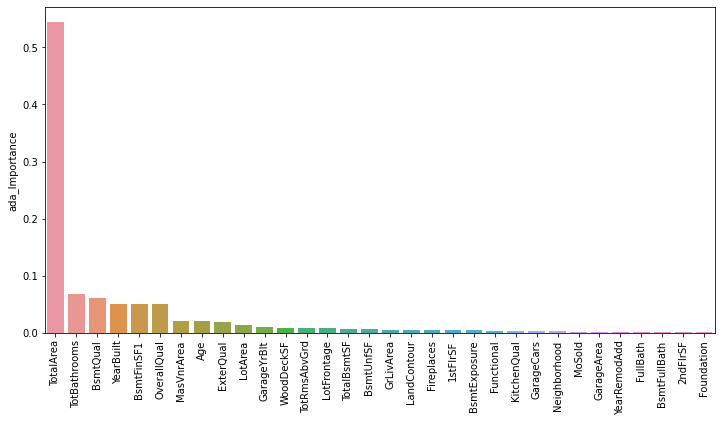

In [328]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_features, x=ada_features.index, y='ada_Importance')

plt.xticks(rotation=90);

## Gradient Boosting

In [329]:
from sklearn.ensemble import GradientBoostingRegressor

In [330]:
grad_model = GradientBoostingRegressor(random_state=101)

In [331]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [332]:
y_pred = grad_model.predict(X_test)
ytrain_pred = grad_model.predict(X_train)

In [333]:
tGrad = validate(y_train, ytrain_pred, y_test, y_pred, "GradientBoost")
tGrad

,GradientBoost train,GradientBoost test
R2,0.970,0.910
mae,9736.469,15294.401
mse,172985311.996,543445647.763
rmse,13152.388,23311.921


In [334]:
pd.concat([tAda, tGrad], axis=1)

,Adaboost train,Adaboost test,GradientBoost train,GradientBoost test
R2,0.892,0.816,0.970,0.910
mae,19673.156,23796.932,9736.469,15294.401
mse,631556870.278,1112332117.926,172985311.996,543445647.763
rmse,25130.795,33351.643,13152.388,23311.921


### Cross-validate Gradient Boosting

In [335]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             8.979048e-01
test_neg_mean_absolute_error       -1.557653e+04
test_neg_mean_squared_error        -5.864365e+08
test_neg_root_mean_squared_error   -2.390724e+04
dtype: float64

<code>
test_r2                             8.979048e-01
test_neg_mean_absolute_error       -1.557653e+04
test_neg_mean_squared_error        -5.864365e+08
test_neg_root_mean_squared_error   -2.390724e+04
dtype: float64
    </code>

### Grid Search for GradientBoosting

In [336]:
param_grid = {"n_estimators":[
#                             50, 100, 200,      #tried 
#                             300, 600,          #tried
#                             900, 1000,         #tried
                            1500, 1750, 2000], 
              "subsample":[
                          0.1, 0.2, 0.4,      #tried 
                          0.8, 
#                             0.9               #tried
                          ], 
              "max_features" : [None, 
                                2, 3, 4,          #tried
                                5
                               ],
              "learning_rate": [
#                               0.001, 0.01,     #tried
                              0.1, 
#                               0.125, 0.15,    #tried
                              0.2,              #tried 
                              0.4
#                               0.5            #tried
                              ], 
              'max_depth':[
                            1,
                            2,          #tried
                            3, 
#                           4, 5          #tried
                          ]
             }

In [337]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
grid_model.fit(X_train, y_train)
grid_model.best_params_

KeyboardInterrupt: 

<code>
 {'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 1500,
 'subsample': 0.8}
   </code>

In [ ]:
# grid_model.best_score_

-22911.085003373926

In [ ]:
# y_pred = grid_model.predict(X_test)
# ytrain_pred = grid_model.predict(X_train)

In [ ]:
# tGradgrid = validate(y_train, ytrain_pred, y_test, y_pred, "GradBoost Grid")
# tGradgrid

<code>
           GradBoost Grid train 	GradBoost Grid test
R2         1.000                	0.910
mae        742.453              	15183.007
mse        899882.398           	542777914.238
rmse       948.621              	23297.595
</code>

In [ ]:
# tAll = pd.concat([tAll, tGradgrid], axis=1)
# tAll

<code>
               linear(numeric) train	linear(numeric) test	linear(numeric-scaled) train	linear(numeric-scaled) test	lasso train	lasso test	lasso_gridCV train	lasso_gridCV test	KNN numeric train	KNN numeric test	GradBoost Grid train	GradBoost Grid test
R2	           0.831	0.812	0.831	0.812	0.831	0.812	0.831	0.812	0.880	0.802	1.000	0.910
mae	           22111.380	23995.758	22111.079	23994.887	22089.078	23984.454	22088.967	23984.560	17359.563	23687.358	742.453	15183.007
mse	           986300242.026	1137323624.908	986296596.324	1137273346.584	986492786.350	1136463862.789	986492565.682	1136450652.004	700747482.102	1202535409.442	899882.398	542777914.238
rmse	       31405.417	33724.229	31405.359	33723.484	31408.483	33711.480	31408.479	33711.284	26471.635	34677.592	948.621	23297.595

</code>

In [ ]:
# grid_model.best_params_

<code>
{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 1500,
 'subsample': 0.8}
    </code>

In [ ]:
# model = GradientBoostingRegressor(random_state=101, learning_rate=0.1, max_depth=3, max_features=None, n_estimators=1500, subsample=0.8)
# scores = cross_validate(model, X_train, y_train, scoring=['r2', 
#             'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
# pd.DataFrame(scores).mean()[2:]

### Feature Selection

In [ ]:
grid_model.best_params_

In [ ]:
model = GradientBoostingRegressor(random_state=101, learning_rate=0.1, max_depth=3, max_features=None, n_estimators=1750, subsample=0.8)
model.fit(X_train, y_train)

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Grad_Importance'])
grad_imp_feats = imp_feats.sort_values('Grad_Importance', ascending=False)
grad_imp_feats

In [ ]:
threshold = 0.005
grad_features = grad_imp_feats[grad_imp_feats.Grad_Importance > threshold]
grad_features

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_features, x=grad_features.index, y='Grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror", gpu_id=0)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
ytrain_pred = xgb_model.predict(X_train)

In [ ]:
tXGB = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost")
tXGB

Overfitting occured.

XGBoost (and other gradient boosting machine routines too) has a number of parameters that can be tuned to avoid over-fitting. I will mention some of the most obvious ones. For example we can change:

- the ratio of features used (i.e. columns used); colsample_bytree. Lower ratios avoid over-fitting.
- the ratio of the training instances used (i.e. rows used); subsample. Lower ratios avoid over-fitting.
- the maximum depth of a tree; max_depth. Lower values avoid over-fitting.
- the minimum loss reduction required to make a further split; gamma. Larger values avoid over-fitting.
- the learning rate of our GBM (i.e. how much we update our prediction with each successive tree); eta. Lower values avoid over-fitting.
- the minimum sum of instance weight needed in a leaf, in certain applications this relates directly to the minimum number of instances needed in a node; min_child_weight. Larger values avoid over-fitting.
- [ref]: https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [ ]:
# pd.concat([tAda, tGrad, tXGB], axis=1)

<code>
     Adaboost train  Adaboost test  GradientBoost train GradientBoost test  XGBBoost train  XGBBoost test
R2   0.892           0.816          0.970               0.910               1.000           0.889
mae  19673.156       23796.932      9736.469            15294.401           678.955         17450.297
mse  631556870.278   1112332117.926 172985311.996       543445647.763       957669.043      671605696.801
rmse 25130.795       33351.643      13152.388           23311.921           978.606         25915.356

### Cros-validate XGBoost

In [ ]:
# model = XGBRegressor(random_state=101, objective="reg:squarederror", gpu_id=0)
# scores = cross_validate(model, X_train, y_train, scoring=['r2', 
#             'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
# pd.DataFrame(scores).iloc[:, 2:].mean()

<code>
test_r2                             8.750215e-01
test_neg_mean_absolute_error       -1.711300e+04
test_neg_mean_squared_error        -7.373485e+08
test_neg_root_mean_squared_error   -2.644849e+04
dtype: float64



### Grid-search XGBoost

In [ ]:
param_grid = {"n_estimators":[
                                50, 100, 300,500, 1000, 1250, 1500, 1750],
              'max_depth':[3,5,6,7], 
              "learning_rate": [0.05, 0.1, 0.2, 0.4],
             "subsample":[0.5, 0.8, 1], 
              "colsample_bytree":[0.5, 1],
             "gpu_id":[0]
             }

In [ ]:
# Xmodel = XGBRegressor(random_state=101, objective="reg:squarederror", gpu_id=0)
# xgb_grid_model = GridSearchCV(estimator=Xmodel,
#                           param_grid=param_grid,
#                           scoring='neg_root_mean_squared_error',
#                           cv=5,
#                           n_jobs = -1)
# xgb_grid_model.fit(X_train, y_train)
# xgb_grid_model.best_params_

In [ ]:
# xgb_grid_model.best_score_

In [ ]:
# y_pred = xgb_grid_model.predict(X_test)
# ytrain_pred = xgb_grid_model.predict(X_train)

In [ ]:
# tXGBgrid = validate(y_train, ytrain_pred, y_test, y_pred, "XGBoost Grid")
# tXGBgrid

In [ ]:
# tBoosting = pd.concat([tXGBgrid, tGradgrid, tAda, tAdaGrid], axis=1)
# tBoosting

### Feature Selection

In [ ]:
# xgb_grid_model.best_params_

In [ ]:
model = XGBRegressor(gpu_id=0, random_state=101, objective="reg:squarederror", colsample_bytree=0.5, learning_rate=0.05, max_dept=3, n_estimators=500, subsample=0.5)
model.fit(X_train, y_train)

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['XGB_Importance'])
xgb_imp_feats = imp_feats.sort_values('XGB_Importance', ascending=False)


In [ ]:
threshold = 0.001
xgb_features = xgb_imp_feats[xgb_imp_feats.XGB_Importance > threshold]
xgb_features

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_features, x=xgb_features.index, y='XGB_Importance')

plt.xticks(rotation=90);

## Compare Feature Importances

In [ ]:
tImp = pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)
tImp

In [ ]:
tImp.plot(kind="bar", figsize=(15, 7))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

# Final Model

In [ ]:
threshold = 0.01
xgb_sel_features = xgb_imp_feats[xgb_imp_feats.XGB_Importance > threshold]
xgb_sel_features

In [ ]:
X_new = X[xgb_sel_features.index]
X_new.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_new, y, test_size=0.2, random_state=101)

- the ratio of features used (i.e. columns used); colsample_bytree. Lower ratios avoid over-fitting.
- the ratio of the training instances used (i.e. rows used); subsample. Lower ratios avoid over-fitting.
- the maximum depth of a tree; max_depth. Lower values avoid over-fitting.
- the minimum loss reduction required to make a further split; gamma. Larger values avoid over-fitting.
- the learning rate of our GBM (i.e. how much we update our prediction with each successive tree); eta. Lower values avoid over-fitting.
- the minimum sum of instance weight needed in a leaf, in certain applications this relates directly to the minimum number of instances needed in a node; min_child_weight. Larger values avoid over-fitting.

-[ref]: https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [ ]:
model = XGBRegressor(random_state=101, objective="reg:squarederror", gpu_id=0, 
                     colsample_bytree=0.2, learning_rate=0.05, 
                     max_dept=3,  
                     n_estimators=300, subsample=0.5
                    )
model.fit(X_train_FS, y_train_FS)
y_pred = model.predict(X_test_FS)
ytrain_pred = model.predict(X_train_FS)
tXGBsel = validate(y_train, ytrain_pred, y_test, y_pred, "XGBBoost FS")
tXGBsel

In [ ]:
# pd.concat([tAda, tGrad, tXGB, tXGBsel], axis=1)

End.

## Submit to competition

In [ ]:
final_model = XGBRegressor(random_state=101, objective="reg:squarederror", gpu_id=0, 
                     colsample_bytree=0.2, learning_rate=0.05, 
                     max_dept=3,  
                     n_estimators=300, subsample=0.5
                    )
final_model.fit(X_new, y)

In [ ]:
# Read the test data
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.sample(10)

In [ ]:
predictor_cols = X_new.columns
predictor_cols

In [ ]:
test = set_TotBathrooms(test)
test = set_TotalArea(test)

test_X = test[predictor_cols]

In [ ]:
overview(test_X)

In [ ]:
count_na(test_X)

In [ ]:
test.GarageType[test.GarageType.isna()] = 'None'
test.BsmtQual[test.BsmtQual.isna()] = 'None'
test.Functional[test.Functional.isna()] = 'None'
test.GarageCars[test.GarageCars.isna()] = 0
test.KitchenQual[test.KitchenQual.isna()] = 'None'
test.TotalBsmtSF = test.TotalBsmtSF.fillna(df_.TotalBsmtSF.median())

TotBathrooms and TotArea are calculated using others. They need a look.

In [ ]:
# df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)
# df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF 
overview(test)

In [ ]:
# df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)
# df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF 

test.BsmtFullBath[test.BsmtFullBath.isna()] = 0.0
test.BsmtHalfBath[test.BsmtHalfBath.isna()] = 0.0
test.TotalBsmtSF[test.TotalBsmtSF.isna()] = 0.0

In [ ]:
test = set_TotalArea(test)
test = set_TotBathrooms(test)

In [ ]:
overview(test)

In [ ]:
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]
predictor_cols

In [ ]:
cat = test_X.select_dtypes("object").columns
cat

In [ ]:
enc = OrdinalEncoder()
test_X[cat] = enc.fit_transform(test_X[cat])

In [ ]:
predicted_prices = final_model.predict(test_X)

In [ ]:
target

In [ ]:
my_submission = pd.DataFrame({'Id': test.Id, target: predicted_prices})

# you could use any filename.
my_submission.to_csv('submission.csv', index=False)

**Done!!** Great Job! 